In [1]:

import numpy as np
import sympy as sp
import math as mat
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def Legendre(l):
    x=sp.symbols("x")
    poly=1/(mat.factorial(l)*2**l)*sp.diff((x**2-1)**l,x,l) #formula de rodrigues    
    return sp.lambdify(x,poly)

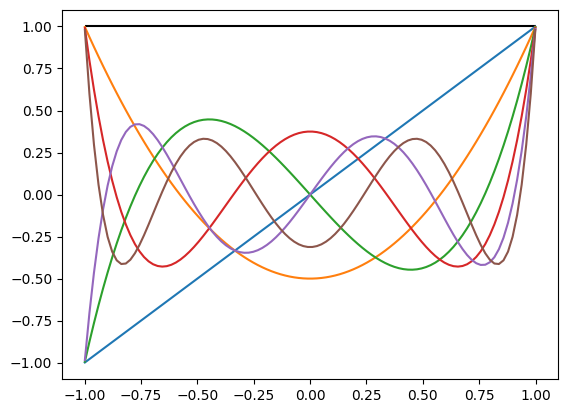

In [3]:
x_ax=np.linspace(-0.999,0.999,100)
for i in range(7):
    if i==0:
        plt.hlines(1,xmin=-1,xmax=1,colors="k")
    else:
        g=Legendre(i)
        plt.plot(x_ax,g(x_ax))
    


In [4]:
def Legendre_asociado(l,m,normal):
    x=sp.symbols("x")
    if normal==True:
        normalizacion=np.sqrt(((2*l+1)*mat.factorial(l-m)))/(2*mat.factorial(l+m))
        poly=normalizacion*(-1)**m/(mat.factorial(l)*2**l)*(1-x**2)**(m/2)*sp.diff((x**2-1)**l,x,l+m) #formula de rodrigues asociado 
        return sp.lambdify(x,poly)
    else:
        poly=(-1)**m/(mat.factorial(l)*2**l)*(1-x**2)**(m/2)*sp.diff((x**2-1)**l,x,l+m) #formula de rodrigues asociado 
        return sp.lambdify(x,poly)
        

In [5]:
def gr_asociado(ls,normal):
    q=len(ls)
    fig=plt.figure(figsize=(q*2,q*2))
    for j in range(q):
        q2=int(np.ceil(q/2))
        ax=fig.add_subplot(q2,q2,j+1)
        for i in range(-ls[j],ls[j] +1):
            g=Legendre_asociado(ls[j],i,normal)
            ax.plot(x_ax,g(x_ax))
        ax.set_title(rf"$\ell={ls[j]}$")
        
        
    

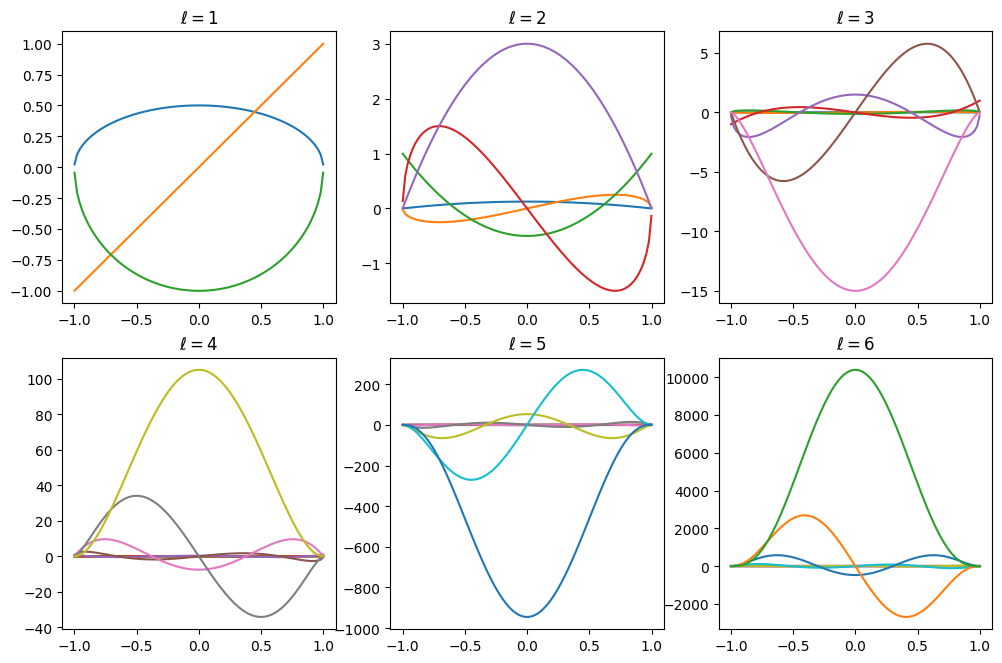

In [6]:
gr_asociado([1,2,3,4,5,6],normal=False)

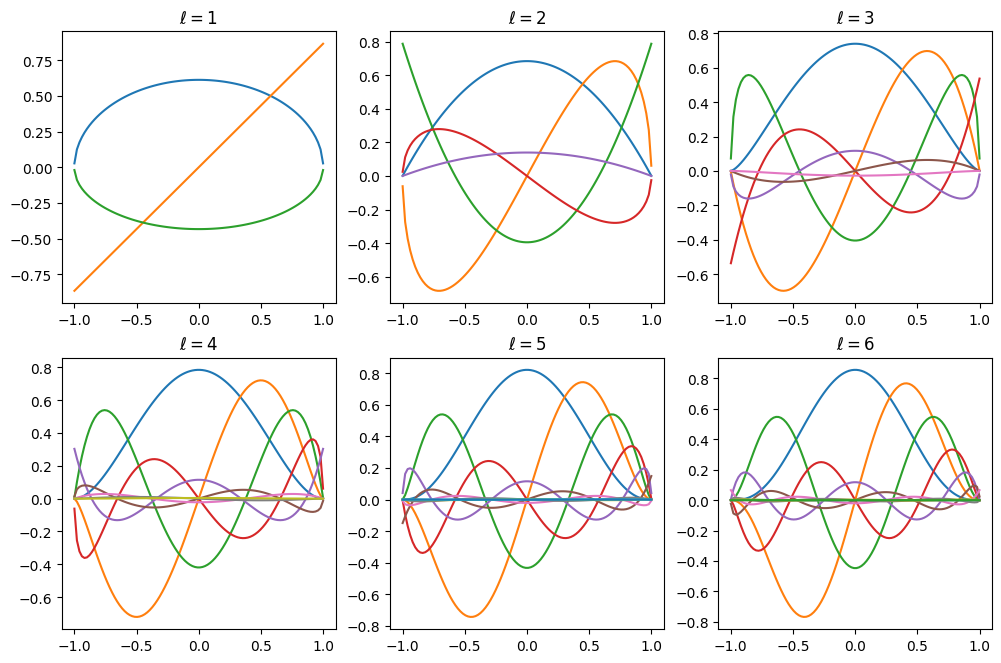

In [7]:
gr_asociado([1,2,3,4,5,6],normal=True)

In [8]:
def Laguerre_aso(j,k,ortnorm):
    x=sp.symbols("x")
    normalizacion=np.sqrt(mat.factorial(j)/mat.factorial(j+k))
    if ortnorm==True:
        poly=normalizacion*sp.exp(-x/2)*x**k*(sp.exp(x)*x**(-k))/mat.factorial(j) * sp.diff(sp.exp(-x)*x**(j+k),x,j)
        return sp.lambdify(x,poly)
    else:
        poly=(sp.exp(x)*x**(-k))/mat.factorial(j) * sp.diff(sp.exp(-x)*x**(j+k),x,j)
        return sp.lambdify(x,poly)

In [9]:
x_ax2=np.linspace(0.00001,10,100)
def gr_laguerreaso(js,k,ort):
    q=len(js)
    p=len(k)
    fig=plt.figure(figsize=(q*2,q*2))
    for i in range(p):
        p2=int(np.ceil(p/2))
        ax=fig.add_subplot(p2,p2,i+1)
        for j in range(q):
            Lag=Laguerre_aso(js[j],k[i],ort)
            ax.plot(x_ax2,Lag(x_ax2))
        ax.set_title(rf"$k={k[i]}$")
        

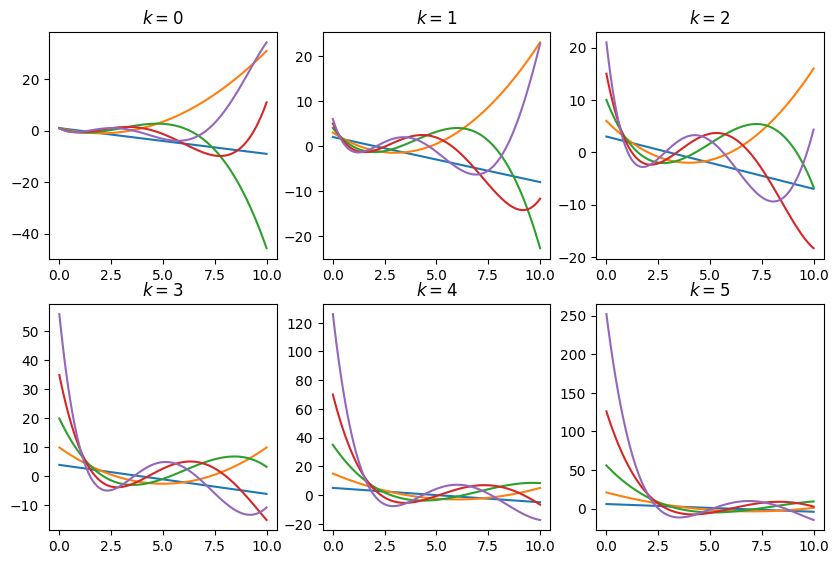

In [10]:
gr_laguerreaso([1,2,3,4,5],[0,1,2,3,4,5],ort=False)

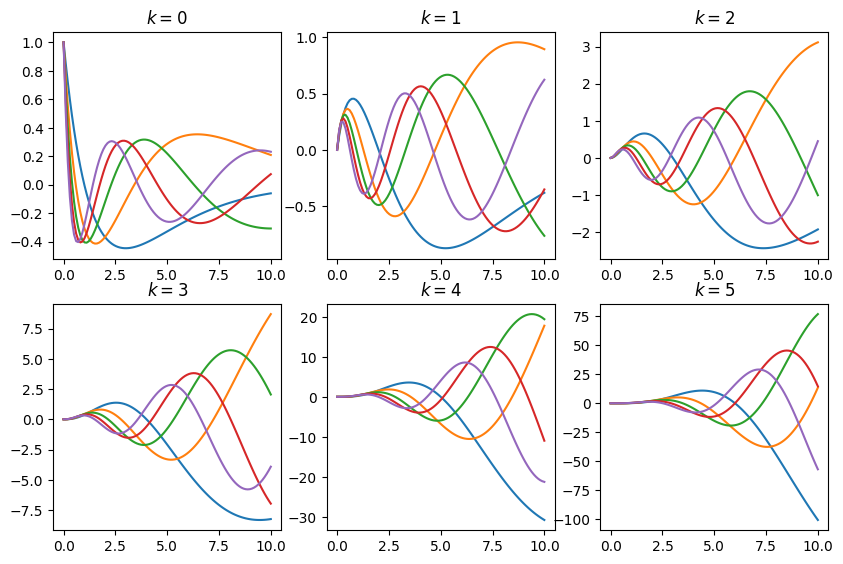

In [11]:
gr_laguerreaso([1,2,3,4,5],[0,1,2,3,4,5],ort=True)

In [12]:
def armonicos(theta,phi,l,m):
    Normalizacion=np.sqrt(((2*l+1)*mat.factorial(l-m))/(4*np.pi*mat.factorial(l+m)))
    legen=Legendre_asociado(l,m,normal=False)
    x=np.cos(theta)
    arm=Normalizacion*np.exp(1j*m*phi)*legen(x)
    return arm
    

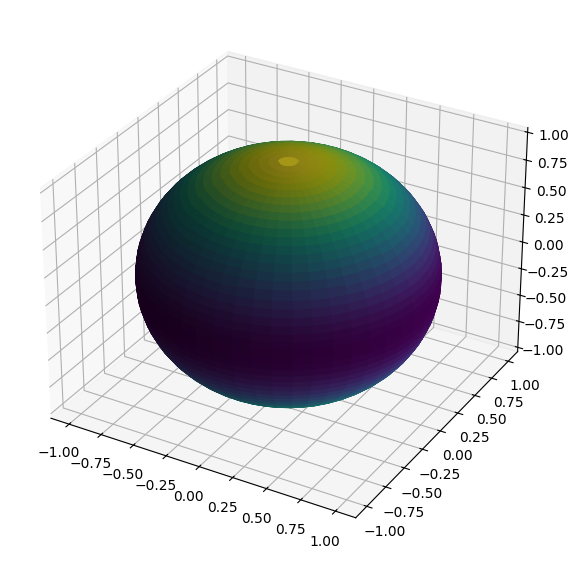

In [13]:

a=50
theta=np.linspace(0,np.pi,a)
phi=np.linspace(0,2*np.pi,a)
esfer=plt.figure(figsize=(7,8))
ax=esfer.add_subplot(projection="3d")
Theta, Phi= np.meshgrid(theta,phi,indexing="ij")
T = armonicos(Theta, Phi, 2, 0).real
norm = plt.Normalize(T.min(), T.max())
X=np.sin(Theta)*np.cos(Phi)
Y=np.sin(Theta)*np.sin(Phi)
Z=np.cos(Theta)
ax.plot_surface(X,Y,Z,facecolors=cm.viridis(norm(T)))

In [14]:
a_0=0.529*10**(-10)
def func_radial(r,n,l):
    norm=2/n**2 * np.sqrt(mat.factorial(n-l-1)/(a_0**3*mat.factorial(n+l)))
    Lag=Laguerre_aso(n-l-1,2*l+1,ortnorm=False)
    func= (2*r/(n*a_0))**l * np.exp(-r/(n*a_0))*Lag(2*r/(n*a_0))
    return norm*func
    
    

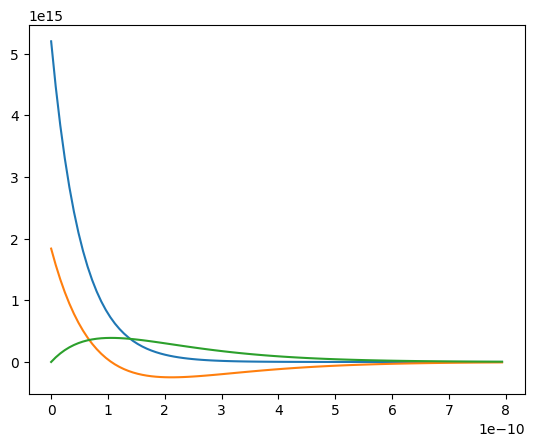

In [15]:
x_ax3=np.linspace(0.00000001*a_0,15*a_0,100)
for i in range(1,3):
    plt.plot(x_ax3,func_radial(x_ax3,i,0))
plt.plot(x_ax3,func_radial(x_ax3,2,1))

In [16]:
def ATOM(r,theta,phi,n,l,m):
    return abs(armonicos(theta,phi,l,m)*func_radial(r,n,l))**2
    

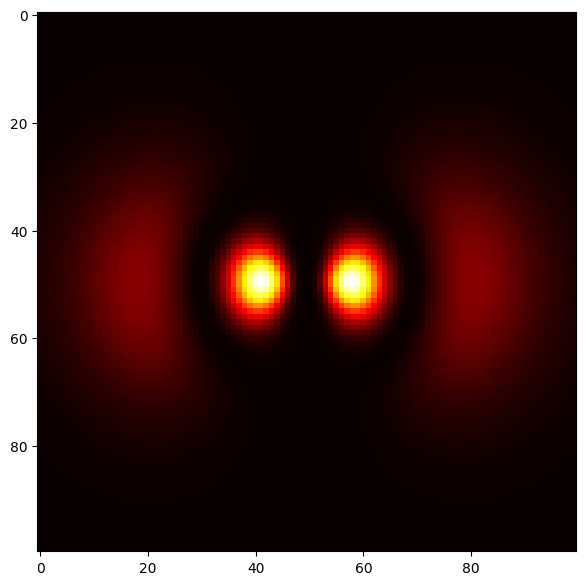

In [72]:
dis=30*a_0
fig_atom=plt.figure(figsize=(7,7))
x_ax4=fig_atom.add_subplot()

x_=np.linspace(-dis,dis,100)
y_=np.linspace(-dis,dis,100)
X_,Y_=np.meshgrid(x_,y_,indexing="ij")
R=np.sqrt(X_**2+Y_**2)
Phi_2=np.arctan2(Y_,X_)
L=ATOM(R,Phi_2,0,4,2,2)

norm2 = plt.Normalize(L.min(), L.max())

x_ax4.imshow(L,cmap="hot")




